# Title: Heart Disease Prediction
`Author:` [Khizer Rehman](khizerr776@gmail.com)\
`Date:` 25-April-2025\
`Dataset:` [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?resource=download)



## **About Dataset**
### **Context**

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.
Content
### **Column Descriptions**:

1. `id` (Unique id for each patient)
2. `age` (Age of the patient in years)
3. `origin` (place of study)
4. `sex` (Male/Female)
5. `cp` chest pain 
   * Typical angina
   * Atypical angina
   * Non-anginal
   * Asymptomatic
6. `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. `chol` (serum cholesterol in mg/dl)
8. `fbs` (if fasting blood sugar > 120 mg/dl)
9.  restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
1.  `thalach:` maximum heart rate achieved
2.  `exang:` exercise-induced angina (True/ False)
3.  `oldpeak:` ST depression induced by exercise relative to rest
4.  `slope:` the slope of the peak exercise ST segment
5.  `ca:` number of major vessels (0-3) colored by fluoroscopy
6.  `thal:` [normal; fixed defect; reversible defect]
7.  `num:` the predicted attribute

## **Acknowledgements**
### **Creators:**

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

### **Relevant Papers**:

* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
**[Web Link](https://archive.ics.uci.edu/dataset/45/heart+disease)**
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." **[Web Link](https://archive.ics.uci.edu/dataset/45/heart+disease)**
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. **[Web Link](https://archive.ics.uci.edu/dataset/45/heart+disease)**

### **Citation Request**:

The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.


## **Aims and Objective**:
we will fill this after doing some exploratory Data Analysis (EDA)

### Import Libraries
Let's start the project by importing all the libraries that we will need in this project.

In [1]:
# import the necessary libraries

# 1. To handle the data
import pandas as pd 
import numpy as np

# 2. To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 4. machine learning 
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score

# for classification task
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# metric for classification task
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA)
#### Explore each Column

In [3]:
# explorating the datatype at each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.shape

(920, 16)

### Explore `id` column

In [ ]:
# id column is not useful for our analysis beacuse it is unique for each row
df['id'].min(), df['id'].max()

(1, 920)

### Explore `age` column

In [ ]:
# 'age' column

# range of "age" column 
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

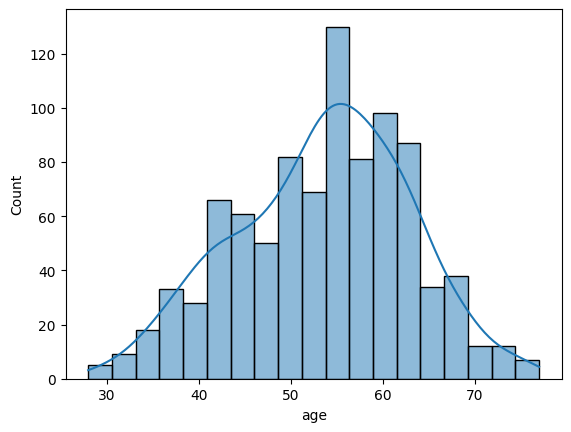

In [9]:
# draw a histogram of the distribution of the "age" column
sns.histplot(df['age'], kde=True)

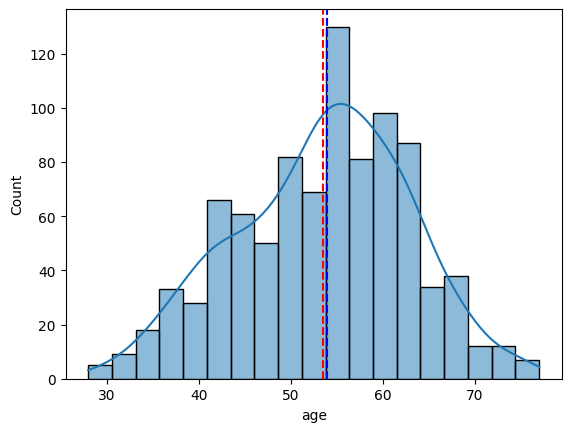

In [10]:
# plot the mean meadian and mode of the "age" column 
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df['age'].median(), color='g', linestyle='--', label='Median')
plt.axvline(df['age'].mode()[0], color='b', linestyle='--', label='Mode')


In [ ]:
# plot the histogram of the "age" column using the coloring by gender
figher =px.histogram(df, x='age', color = 'sex')
figher.show()

### Explore `sex` column

In [15]:
# find the valuecount of the "sex" column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [ ]:
# calculating the percentage of male and female values count in data
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculating percentage
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# print the percentages of male and female values count in data
print(f'Male percentage: {male_percentage:.2f}%')
print(f'Female percentage: {female_percentage:.2f}%')

# difference between male and female values count in data
difference_percentage = ((male_count - female_count) / female_count) * 100

# using the absolute difference between male and female values count in data
# difference_percentage = abs(male_percentage - female_percentage)

print(f'Males are {difference_percentage:.2f}% more than females in the dataset.')

Male percentage: 78.91%
Female percentage: 21.09%
Males are 274.23% more than females in the dataset.


In [14]:
# find the value count of the age column or group by 
# df['age'].value_counts().sort_index()

# use groupby
df.groupby('sex')['age'].value_counts().sort_index()

sex     age
Female  30     1
        31     1
        32     1
        33     1
        34     2
              ..
Male    72     4
        74     6
        75     3
        76     1
        77     2
Name: count, Length: 91, dtype: int64

### Explore `dataset` column

In [18]:
# lets deal with dataset column of our dataset
# find the unique values in dataset column 
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [19]:
# lets find the value count of the dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [29]:
# plot the countplot of the dataset column
# count_plot = sns.countplot(data = df , x = 'dataset', hue = 'sex')

# Better plots with plotly
fig = px.bar(df, x = 'dataset', color = 'sex' )
fig.show()


In [ ]:
# print the values count of dataset column grouped by sex and sort by values count 
print(df.groupby('sex')['dataset'].value_counts().sort_values())

sex     dataset      
Female  VA Long Beach      6
        Switzerland       10
        Hungary           81
        Cleveland         97
Male    Switzerland      113
        VA Long Beach    194
        Cleveland        207
        Hungary          212
Name: count, dtype: int64


In [ ]:
# make a plot age column grouped by dataset column by using plotly 
fig = px.histogram(df, x= 'age', color= 'dataset')
fig.show()



,dataset,mean,median,mode
0,Cleveland,54.351974,55.5,58
1,Hungary,47.894198,49.0,54
2,Switzerland,55.317073,56.0,61
3,VA Long Beach,59.350000,60.0,62


In [34]:
# print the mean median and mode of the age column grouped by dataset column
df.groupby('dataset')['age'].agg(['mean', 'median', lambda x: x.mode()[0]]).rename(columns={'<lambda_0>': 'mode'}).reset_index()

# second way to do it 
print(f"Mean of Data Set: {df.groupby('dataset')['age'].mean()}")
print("-------------------------------------------------")
print(f"Median of Data Set: {df.groupby('dataset')['age'].median()}")
print("-------------------------------------------------")
print(f"Mode of Data Set: {df.groupby('dataset')['age'].agg(lambda x: x.mode()[0])}")
print("-------------------------------------------------")

Mean of Data Set: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-------------------------------------------------
Median of Data Set: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-------------------------------------------------
Mode of Data Set: dataset
Cleveland        58
Hungary          54
Switzerland      61
VA Long Beach    62
Name: age, dtype: int64
-------------------------------------------------


### Let's Explore the `cp`(Chest Pain) column 

In [ ]:
# find the value count of cp column in our dataset
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

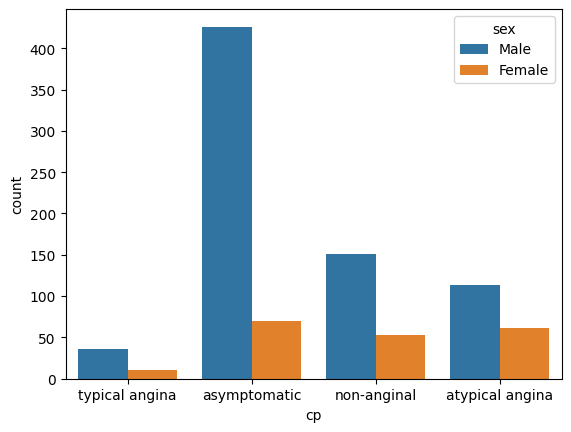

In [41]:
# draw a countplot of cp column in our dataset
sns.countplot(data= df , x= 'cp', hue= 'sex')

<Axes: xlabel='cp', ylabel='count'>

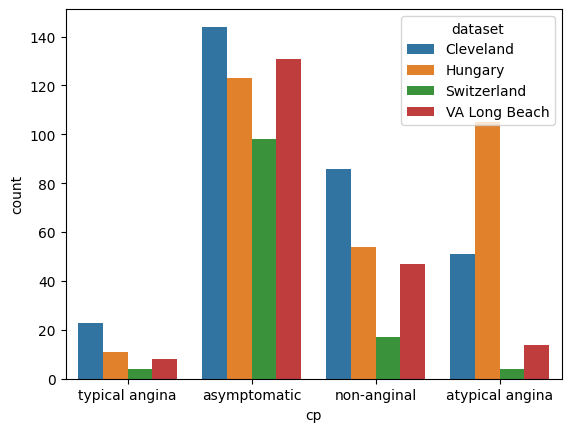

In [43]:
# draw histogram of cp column in our dataset 
sns.countplot(data= df , x= 'cp', hue= 'dataset')

In [40]:
# draw histogram of cp column of our dataset
fig = px.histogram(df, x = 'age', color = 'cp')
fig.show()

### Explore the `trestbps` (resting blood pressure) column
The normal resting blood pressure is 120/80 mm Hg.\
`Write here, what will happen of the blood pressure is high or low and then you can bin the data based on those values`

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
# find the details of trestbps column in our dataset, we can use describe because it is a float column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

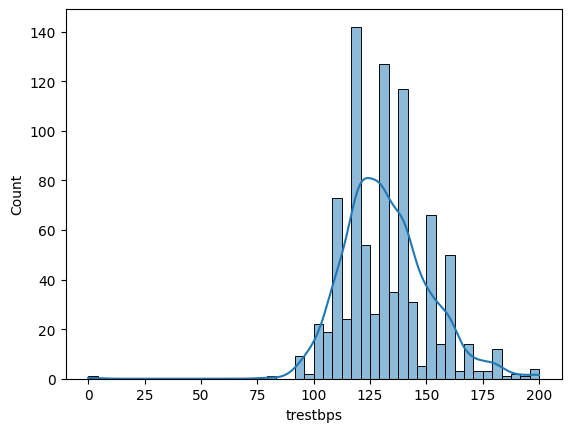

In [47]:
# create a histogram of the trestbps column in our dataset
sns.histplot(df['trestbps'], kde=True)

# **Dealing with the missing values**

In [48]:
# check the value count of missing values in our dataset
df.isnull().sum().sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64

In [49]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

### Outputs:
1. The minimum age to have a heart disease starts from 28 year.
2. Most of the people get heart disease at the age of 53-54 years.
3. Most of the males and females get are with heart disease at the age of 54-55 years.
4. Male percentage: 78.91%
5. Female percentage: 21.09%
6. Males are 274.23% more than females in the dataset.
7. We have highest number of patients from Cleveland (304) and lowest from Switzerland (123)
   1. Highest number of female in dataset belongs to Cleveland (97) and lowest number from VA long Beach (6)
   2. The highest number of male in this dataset belongs to Hungary and lowest belongs to Switzerland (113)
8. `Here we write the observation about mean ,median , mode of the age column grouped by dataset column`
------------
* Mean of Data Set: dataset\
    Cleveland        54.351974\
    Hungary          47.894198\
    Switzerland      55.317073\
    VA Long Beach    59.350000
-------------
* Median of Data Set: dataset\
    Cleveland        55.5\
    Hungary          49.0\
    Switzerland      56.0\
    VA Long Beach    60.0
------------
* Mode of Data Set: dataset\
    Cleveland        58\
    Hungary          54\
    Switzerland      61\
    VA Long Beach    62
---------------

9. `cp` colum observations 
   1.  `asymptomatic` ------ 496
   2.  `non-anginal`  -------- 204
   3.  `atypical angina`--- 174
   4.  `typical angina`----- 46